% ISOM 3025 Lect7
% Yi Ding
% 27 November 2022

# Lecture 7: Application in Finanical Risk Management 


## Outlines

In this lecture:

* Understanding Geometric Brownian motion model
* Use Python to simulate stock price paths
* Using simulation method to compute Valute-at-risk



## Geometric Brownian Motion model


```
The name Brownian comes from the Scottish botanist Robert Brown who, in 1827, observed, under the microscope, how pollen particles suspended in water moved continuously in a random and unpredictable way. In 1905, it was Einstein who gave
a molecular interpretation of the phenomenon of movement observed by Brown. He suggested that the motion of the particles was mathematically describable, assuming that the various jumps were due to the random collisions of pollen particles with water molecules.

```


**Defining a standard Brownian motion**
The essential properties of a standard Brownian motion
include the following:

* The standard Brownian motion starts from zero.
* The standard Brownian motion takes a continuous path.
* The incrementation of the Brownian process are independent.
* The incrementation of the Brownian process in the time interval, $dt$, has a Gaussian distribution, with an average that is equal to zero and a variance that is equal to the time interval, $dt$.

Suppose that we consider a process $Y(t)$. After choosing two instants, $t$ and $s$, the random variable, $Y
(s) -Y (t)$, follows a normal distribution, with a mean of $\mu\times(s-t)$ and variance of $\sigma^2\times (s-t)$, $\mu$ and $\sigma$ are two constant, 
then $Y(t)$ can be represented as a linear transformation of standard Brownian motion:
$$
Y(t)=Y(0)+\mu \times t +\sigma Z(t), $$
where $Z(t)$ is standard brownian motion. 


An small interval $dt$, the increment of the standard brownian motion is
$$Z(t+dt)-Z(t)= N(0,1)\times \sqrt{dt}.$$

We can then use the above equations to simulate paths for $Y(t)$. 



## Simulating paths of Geometric Brownian motion

### Simulating standard Brownian motion

We use the approximation of the standard Brownian motion formula and discretization approach to simulate paths of standard brownian motion



Example: Simulate standard Brownian motion for an interval $[0,1]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
np.random.seed(4)
n = 1000
SQN = 1/math.sqrt(n)



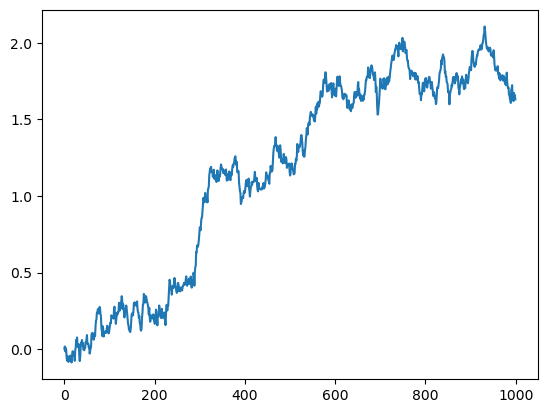

In [2]:
EpsValues = np.random.randn(n)
Zt = 0
SBMotion=list()
for t in range(n):
    Zt =Zt + SQN*EpsValues[t]
    SBMotion.append(Zt)
plt.plot(SBMotion)
plt.show()    
    
    

Next we simulate path for $Y(t)=Y(0)+\mu t + \sigma Z(t)$.

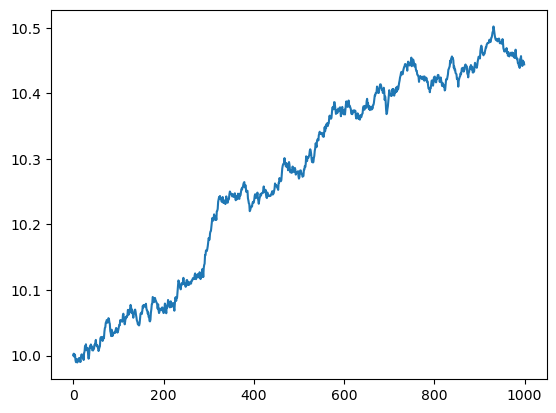

In [3]:
mu=0.2
Y_0=10
sig=0.15

Yt=list()

for t in range(n):
    Yt.append(Y_0+SBMotion[t]*sig+mu*t*SQN*SQN)

plt.plot(Yt)
plt.show()    

## Using Monte Carlo methods for stock price path simulation

Stock price is usually modeled with a Brownian motion with mean. Next, we simulate paths for price of AMZN.

### Download AMZN historical data
First, download data from YAHOO Finance. Go to https://finance.yahoo.com/quote/AMZN/history/.

Alternatively, using python to load data from Yahoo finance:

In [4]:
import pandas as pd
import yfinance as yf
#if have n't install then do 'pip install yfinance'
from yahoofinancials import YahooFinancials
# if haven't install then do 'pip install YahooFinancials'


In [5]:
import yfinance as yf

AMZN = yf.Ticker("AMZN")

# get stock info
AMZN.info


{'address1': '410 Terry Avenue North',
 'city': 'Seattle',
 'state': 'WA',
 'zip': '98109-5210',
 'country': 'United States',
 'phone': '206 266 1000',
 'website': 'https://www.aboutamazon.com',
 'industry': 'Internet Retail',
 'industryKey': 'internet-retail',
 'industryDisp': 'Internet Retail',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': "Amazon.com, Inc. engages in the retail sale of consumer products, advertising, and subscriptions service through online and physical stores in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Echo, Ring, Blink, and eero; and develops and produces media content. In addition, the company offers programs that enable sellers to sell their products in its stores; and programs that allow auth

In [6]:
ticker = yf.Ticker('AMZN')
AMZN_df = ticker.history(period="10y")
print(AMZN_df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2014-03-06 00:00:00-05:00 to 2024-03-06 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2518 non-null   float64
 1   High          2518 non-null   float64
 2   Low           2518 non-null   float64
 3   Close         2518 non-null   float64
 4   Volume        2518 non-null   int64  
 5   Dividends     2518 non-null   float64
 6   Stock Splits  2518 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.4 KB
None


Date
2014-03-06 00:00:00-05:00    18.608000
2014-03-07 00:00:00-05:00    18.603001
2014-03-10 00:00:00-04:00    18.526501
2014-03-11 00:00:00-04:00    18.441000
2014-03-12 00:00:00-04:00    18.532000
Name: Close, dtype: float64
Date
2024-02-29 00:00:00-05:00    176.759995
2024-03-01 00:00:00-05:00    178.220001
2024-03-04 00:00:00-05:00    177.580002
2024-03-05 00:00:00-05:00    174.119995
2024-03-06 00:00:00-05:00    175.074997
Name: Close, dtype: float64


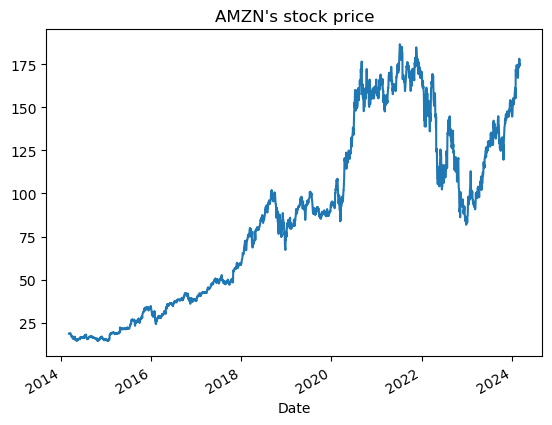

In [7]:
AMZN_df['Close'].plot(title="AMZN's stock price")
AmznData=AMZN_df['Close']
print(AmznData.head())
print(AmznData.tail())

In [8]:
print(AmznData.describe())

count    2518.000000
mean       86.938491
std        51.699468
min        14.347500
25%        38.029124
50%        88.253250
75%       130.760128
max       186.570496
Name: Close, dtype: float64


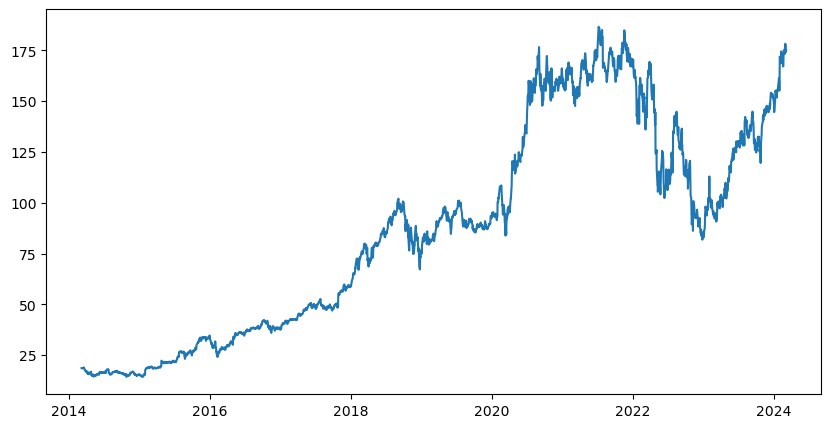

In [9]:
plt.figure(figsize=(10,5))
plt.plot(AmznData)
plt.show()


Alternative way of loading data: 

Downloading csv data from yahoo finance. then use read.csv method in panda to read. 


In [10]:
# AMZN_df= pd.read_csv('AMZN.csv',header=0,usecols = ['Date','Close'],parse_dates=True,index_col='Date')    
# AmznData=AMZN_df['Close']

file_path = r'C:\Users\陈煜\Desktop\AMZN.csv'
AMZN_df = pd.read_csv(file_path, header=0, usecols=['Date', 'Close'], parse_dates=True, index_col='Date')
AmznData = AMZN_df['Close']

We see that the graph has exponential growth. If we compute the logrithm of the price, we see it has a linear trend, and look like a brownian motion.



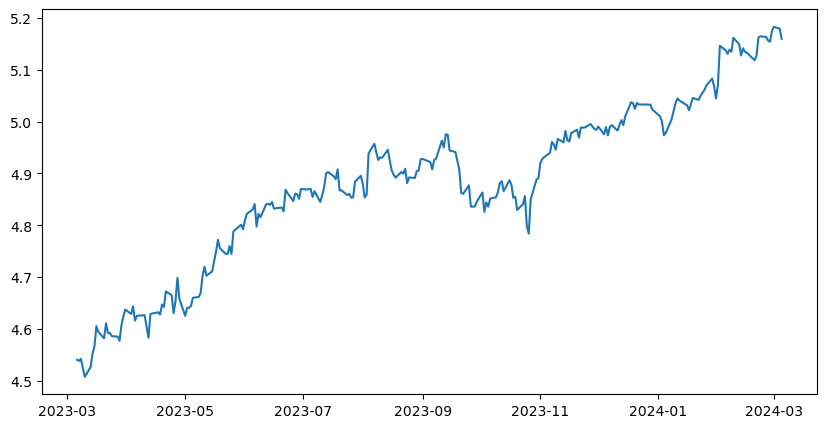

In [11]:
plt.figure(figsize=(10,5))
plt.plot(np.log(AmznData))
plt.show()

### Modeling log price using Geometric Brownian Motion

The stock price behaves like an exponential of brownian motion, that is, a Geometric Brownian Motion.
$$\log (P(t))=Y(t)=\mu \times t + \sigma \times Z(t).$$

### Log return

For a frequency $\Delta$, the log return of stock is 

$$R_t=\log(P(t))-\log (P(t-\Delta)).$$


Suppose that we use Geometric Brownian Motion to model stock price, then 
$$R_t= Y(t)-Y(t-\Delta)=\mu \times \Delta  +\sigma \sqrt{\Delta } N(0,1).$$

Note that distribution of $R_t$ only relates to $\mu$, $\Delta$, and $\sigma$ and not $t$. In particular, $R_t$ is a stationary time series with fixed distribuition. 


252
[-2.13558006e-03  3.94725000e-03 -1.79410519e-02 -1.66141867e-02
  1.85635050e-02  2.61613024e-02  1.38164229e-02  3.91407895e-02
 -1.09554743e-02 -1.26107440e-02  2.92477685e-02 -1.91667502e-02
  1.01332255e-04 -5.89314865e-03 -9.17530787e-04 -8.19343998e-03
  3.04849373e-02  1.73057471e-02  1.25677624e-02 -8.55617255e-03
  1.49255823e-02 -2.77998792e-02  9.45074980e-03  1.07721699e-03
 -2.22682272e-02 -2.11385469e-02  4.56554332e-02  1.07364217e-03
  2.24113127e-03 -4.29180329e-03  1.93616885e-02 -4.70910483e-03
  2.98926375e-02 -7.03666653e-03 -3.48727646e-02  2.32243921e-02
  4.50727774e-02 -4.06057834e-02 -3.27739598e-02  1.53639156e-02
  1.93023931e-04  3.37104096e-03  1.58355305e-02  1.60762241e-03
  7.43708753e-03  3.29350271e-02  1.78985574e-02 -1.72634928e-02
  8.48912354e-03  1.95910541e-02  1.83491210e-02  2.26844906e-02
 -1.62119761e-02 -1.07239460e-02 -1.73947827e-04  1.51897459e-02
 -1.51027682e-02  4.34758695e-02  1.28223039e-02 -8.91685212e-03
  1.79992121e-02  1.1

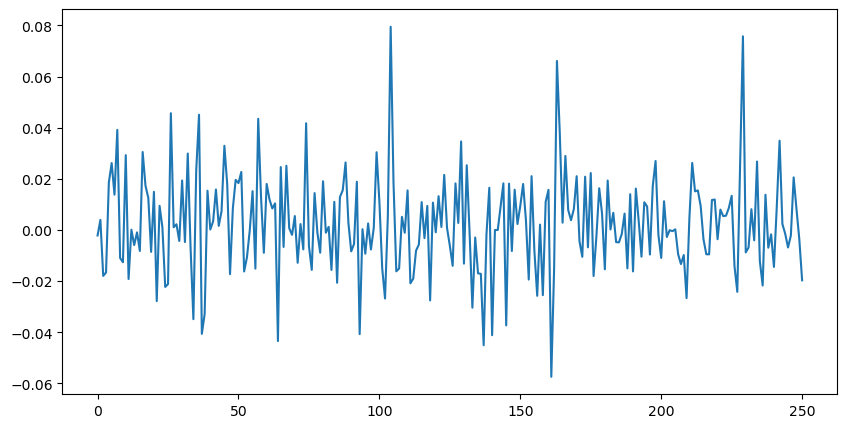

In [12]:
plt.figure(figsize=(10,5))
n=len(AmznData)
print(n)
Rt=np.diff((np.log(AmznData)))
#print(np.log(AmznData))
print(Rt)
plt.plot(Rt)
plt.show()

## Learning the parameters $\mu$ and $\sigma$

If we known the $\mu$ and $\sigma$, we can then generate log price pricess $Y(t)$ using the approach before, and then taking the exponent, $P(t)=\exp(Y(t))$. 

We will next estimate the parameters $\mu$ and $\sigma$ from the data. 

Note that under the Geometric Brownian motion model, the log return $R_t$  follows $N(\mu\Delta, \sigma^2 \Delta)$. Based on historical data of log returns, we can estimate $\mu$ and $\sigma$. 

Suppose that we sample at daily frequency and set $\Delta=1$.

Then by Large of large number, we estimate $\mu$ and $\sigma$ by the sample mean and sample standard deviation of $R_t$. 
$$\hat{\mu}=\sum_{t=1}^T R_t/T.$$
$$\hat{\sigma}=\sqrt{\sum_{t=1}^T (R_t-\hat{\mu})^2/T}.$$


In [13]:
hatmu=np.array(Rt.mean())
hatsig = np.array(Rt.std())
print(hatmu)
print(hatsig)

0.0024665857494731
0.018989342984270175


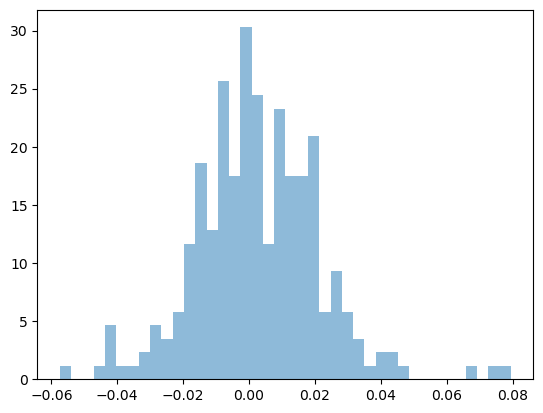

In [14]:

plt.figure()
plt.hist(Rt,bins=40, density=True, histtype='stepfilled',alpha=0.5)
plt.show()


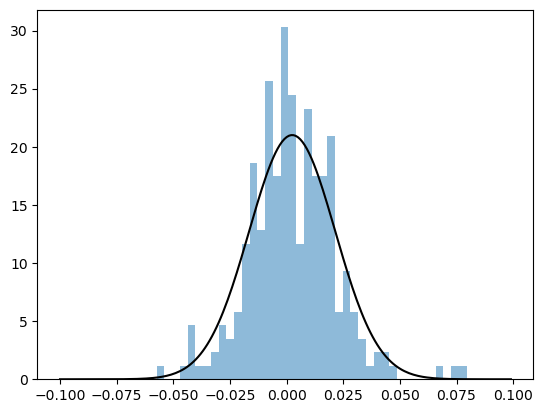

In [15]:
# Compare with normal
from scipy.stats import norm
data = np.arange(-0.1,0.1,0.001)
pdf = norm.pdf(data , loc = hatmu , scale = hatsig )
 
#Visualizing the distribution

plt.figure()
plt.hist(Rt, bins=40,density=True, histtype='stepfilled',alpha=0.5)
plt.plot(data, pdf , color = 'black')
plt.show()

Do the data match well with normal distribution?


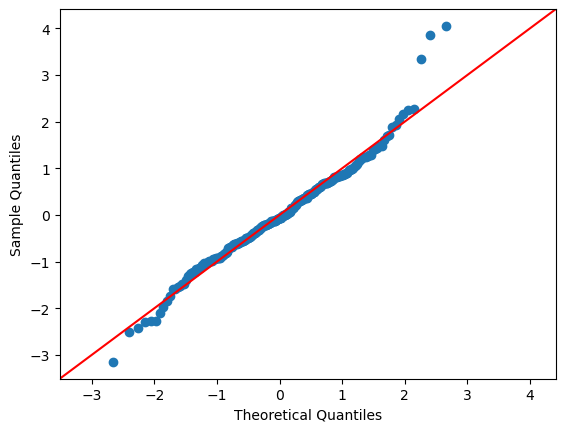

In [16]:
import statsmodels.api as sm
sm.qqplot((Rt-hatmu)/hatsig, line ='45')
import pylab as py
py.show()

Observations: Stock returns have heavier tails than simulated ones.

How to solve (for interesting readers)?

* simulating innovations with heavier tail than normal
* non-i.i.d. data, volatility clustering, GARCH/ARCH models for volatility. 

We will simulate trajactory path for the stock prices. We will simulate stock price path for a period of 5 days, starting from 5 days before today.



In [17]:
P_0=AmznData.tail(6).iloc[0]
print(P_0)
Recentprice=AmznData.tail(10)
print(Recentprice)

173.539993
Date
2024-02-21    168.589996
2024-02-22    174.580002
2024-02-23    174.990005
2024-02-26    174.729996
2024-02-27    173.539993
2024-02-28    173.160004
2024-02-29    176.759995
2024-03-01    178.220001
2024-03-04    177.580002
2024-03-05    174.119995
Name: Close, dtype: float64


In [18]:
# SIMULATE 5 days
np.random.seed(4)
n = 5
SQN = 1 # we set daily frequency and generate daily returns

EpsValues = np.random.randn(n)
Zt = 0
SBMotion=list()
for t in range(n):
    Zt =Zt + SQN*EpsValues[t]
    SBMotion.append(Zt)

mu=hatmu
Y_0=np.log(P_0)
sig=hatsig

Yt=np.log(Recentprice)

for t in range(n):
    Yt.tail(n).iloc[t]=(Y_0+SBMotion[t]*sig+mu*SQN*SQN*t)



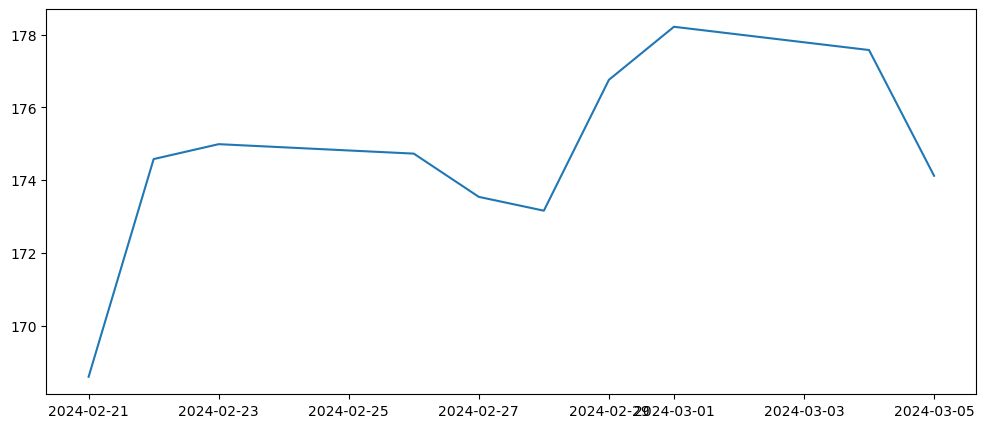

In [19]:
plt.figure(figsize=(12,5))
plt.plot(Recentprice)
plt.show()    
    

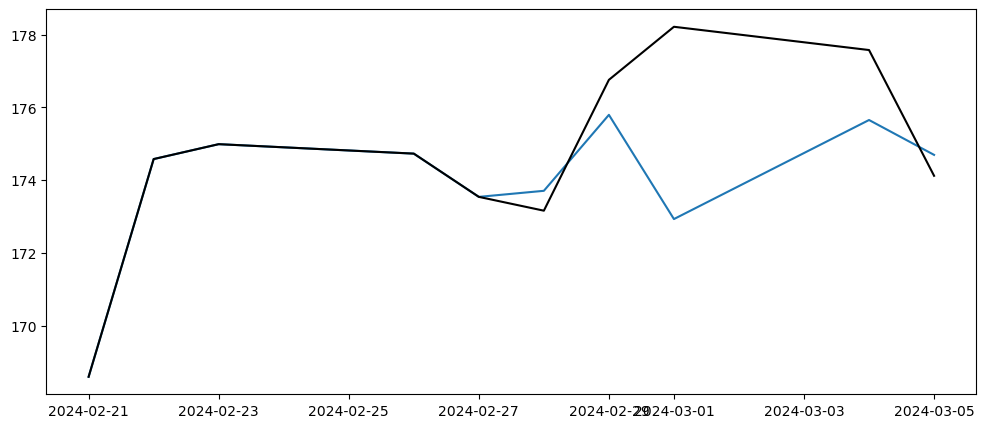

In [20]:
simu_Price=np.exp(Yt)
plt.figure(figsize=(12,5))
plt.plot(simu_Price)

plt.plot(Recentprice,"k")
plt.show()    
    

Can we predict price better (for interesting readers)?
* better mean prediction? (harder)
* better volatility prediction? (easier, GARCH/ARCH models, etc)

In next lecture, we will use simulated price paths to compute risk management measure.

Reference: GC Chapter 8


